<a href="https://colab.research.google.com/github/ApurbaSubedi/AI_Assignment/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EDA Assignment

Using a valorant agents dataset


In [1]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load dataset
def load_dataset(file_path):
    return pd.read_csv(file_path)

file_path = "/content/drive/MyDrive/agents.csv"

df = load_dataset(file_path)

df.head(5)


,agent,pick_rate,rounds,rating,ACS,K/D,ADR,KPR,DPR,APR,FBPR,FDPR,HS%,FBSR%
0,Jett,78.14%,462467,1.08,232.8,1.10,148.7,0.82,0.74,0.16,0.19,0.16,25%,54%
1,Sova,76.00%,450157,0.97,194.6,0.98,133.5,0.66,0.68,0.32,0.06,0.06,25%,49%
2,Astra,48.14%,284853,0.98,186.6,0.99,123.8,0.68,0.68,0.32,0.07,0.07,26%,48%
3,Viper,42.67%,253988,0.95,193.1,0.97,128.4,0.67,0.69,0.28,0.08,0.09,25%,46%
4,Killjoy,34.27%,202132,0.91,197.4,1.00,134.3,0.69,0.69,0.18,0.08,0.09,22%,48%


In [4]:
df.dtypes

agent         object
pick_rate     object
rounds         int64
rating       float64
ACS          float64
K/D          float64
ADR          float64
KPR          float64
DPR          float64
APR          float64
FBPR         float64
FDPR         float64
HS%           object
FBSR%         object
dtype: object

In [5]:
df.count()

agent        18
pick_rate    18
rounds       18
rating       18
ACS          18
K/D          18
ADR          18
KPR          18
DPR          18
APR          18
FBPR         18
FDPR         18
HS%          18
FBSR%        18
dtype: int64

(array([3., 2., 2., 2., 1., 1., 3., 1., 1., 2.]),
 array([0.9  , 0.918, 0.936, 0.954, 0.972, 0.99 , 1.008, 1.026, 1.044,
        1.062, 1.08 ]),
 <BarContainer object of 10 artists>)

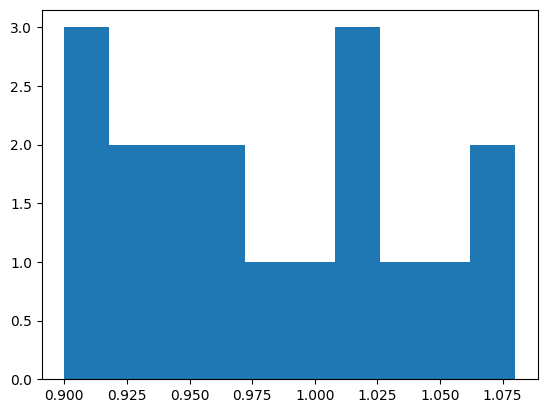

In [6]:
#histogram
plt.hist(df["rating"])

<ipython-input-7-40fa0edc5026>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rounds'])


<Axes: xlabel='rounds', ylabel='Density'>

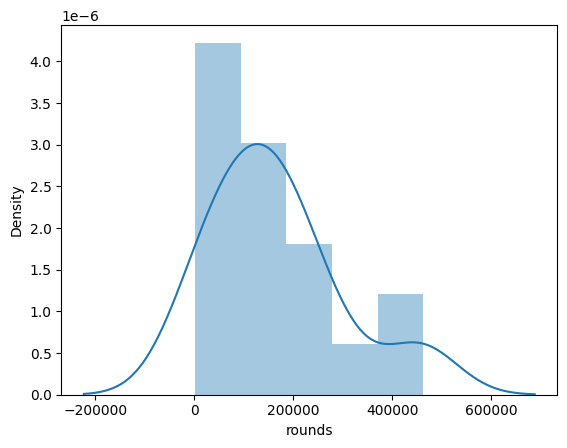

In [7]:
#distplot
sns.distplot(df['rounds'])

In [8]:
#to convert rating into numeric value
df['rating'].apply(pd.to_numeric, errors="coerce")

0     1.08
1     0.97
2     0.98
3     0.95
4     0.91
5     1.01
6     0.94
7     0.93
8     1.02
9     1.07
10    0.90
11    0.90
12    1.04
13    0.97
14    1.02
15    0.99
16    1.06
17    0.92
Name: rating, dtype: float64

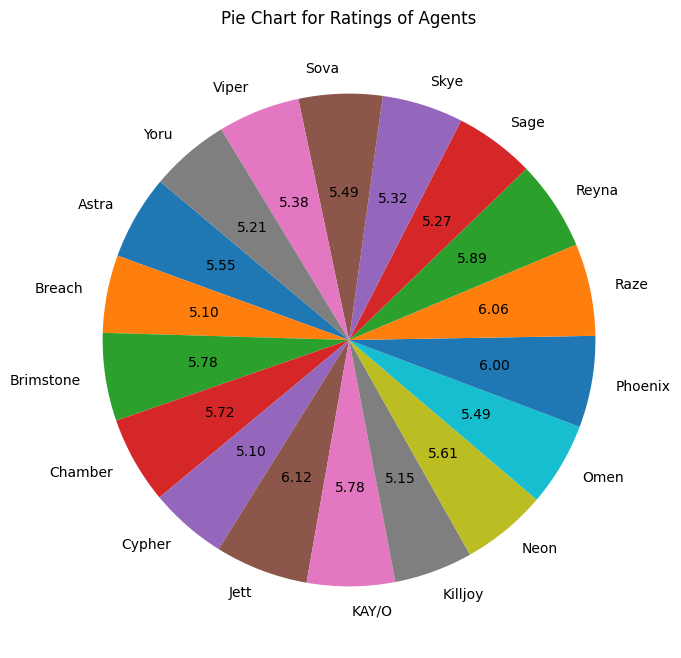

In [9]:
#pie-chart
agent_ratings = df.groupby('agent')['rating'].mean()

plt.figure(figsize=(10, 8))
plt.pie(agent_ratings, labels=agent_ratings.index, autopct='%0.2f', startangle=140)
plt.title('Pie Chart for Ratings of Agents')

plt.show()

<Axes: ylabel='ACS'>

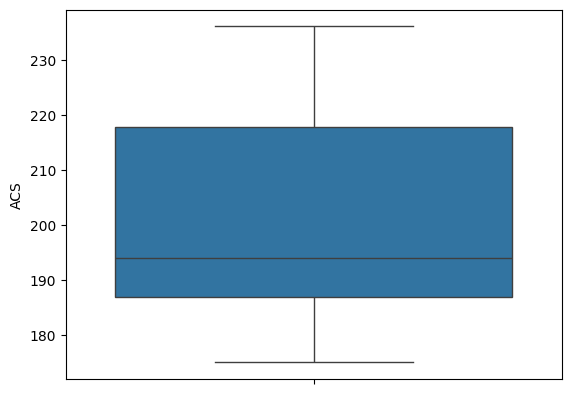

In [10]:
#boxplot for average combat score
sns.boxplot(df['ACS'])

In [19]:
df.describe()

,rounds,rating,ACS,K/D,ADR,KPR,DPR,APR,FBPR,FDPR
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,164091.888889,0.981111,201.588889,0.984444,133.077778,0.704444,0.715556,0.257778,0.100556,0.104444
std,133889.186290,0.058801,19.217483,0.062140,12.056902,0.062235,0.027273,0.088088,0.038877,0.031478
min,1978.000000,0.900000,175.000000,0.900000,117.100000,0.630000,0.680000,0.150000,0.060000,0.060000
25%,82658.250000,0.932500,186.850000,0.942500,124.050000,0.660000,0.700000,0.180000,0.070000,0.082500
50%,147818.000000,0.975000,194.050000,0.975000,130.000000,0.675000,0.705000,0.255000,0.080000,0.095000
75%,203398.750000,1.020000,217.825000,1.037500,142.375000,0.765000,0.740000,0.320000,0.130000,0.120000
max,462467.000000,1.080000,236.100000,1.100000,156.600000,0.820000,0.760000,0.430000,0.190000,0.170000


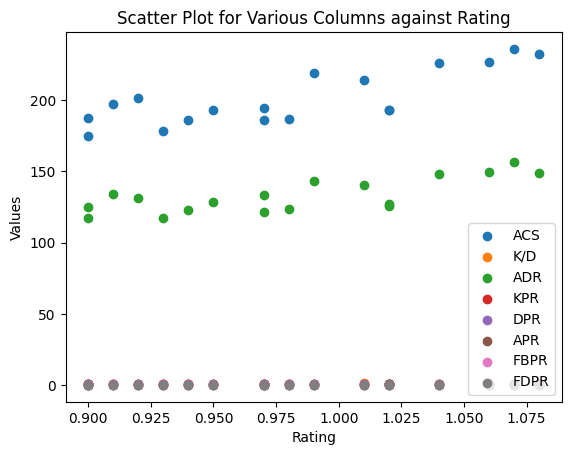

In [11]:
#Scatter plot for columns against 'rating'
columns_to_plot = ['ACS', 'K/D', 'ADR', 'KPR', 'DPR', 'APR', 'FBPR', 'FDPR']

for column in columns_to_plot:
    plt.scatter(df['rating'], df[column], label=column)

plt.xlabel('Rating')
plt.ylabel('Values')
plt.title('Scatter Plot for Various Columns against Rating')
plt.legend(loc='lower right')

plt.show()


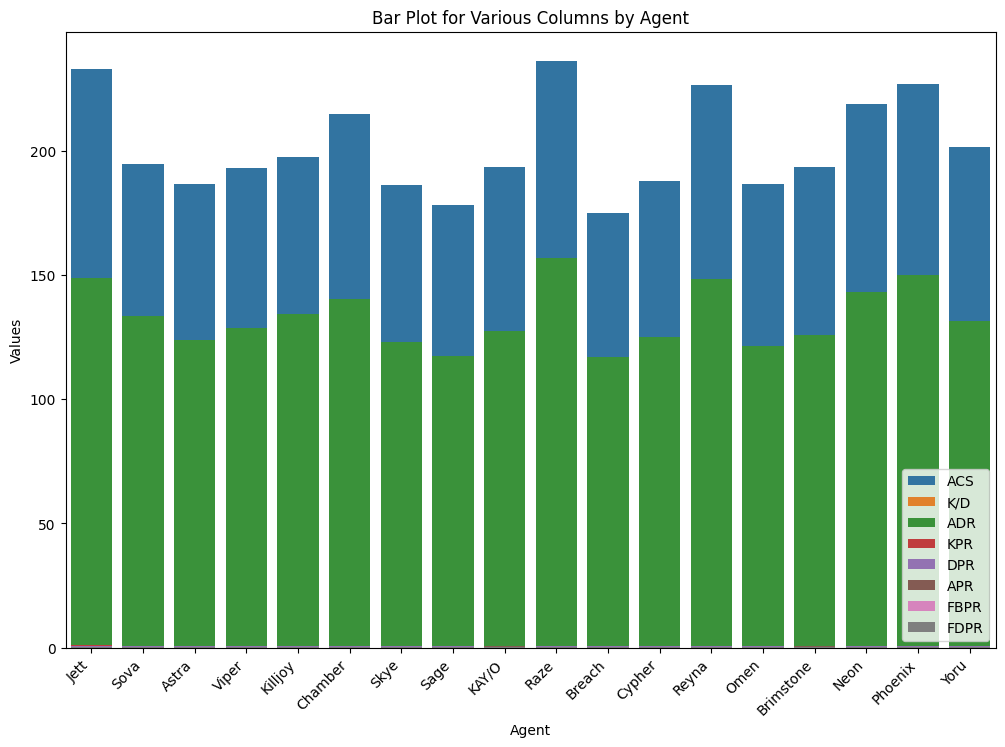

In [12]:
#barplot
columns_to_plot = ['ACS', 'K/D', 'ADR', 'KPR', 'DPR', 'APR', 'FBPR', 'FDPR']

plt.figure(figsize=(12, 8))
for column in columns_to_plot:
    sns.barplot(x='agent', y=column, data=df, label=column)

plt.xlabel('Agent')
plt.ylabel('Values')
plt.title('Bar Plot for Various Columns by Agent')

plt.xticks(rotation=45, ha='right')

plt.legend(loc='lower right')

plt.show()

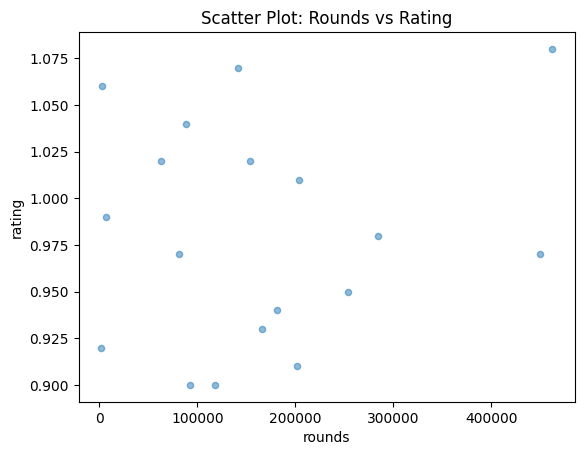

In [23]:
#scatter plot
df.plot.scatter(x='rounds', y='rating',title='Scatter Plot: Rounds vs Rating', alpha=0.5)
eplt.show()

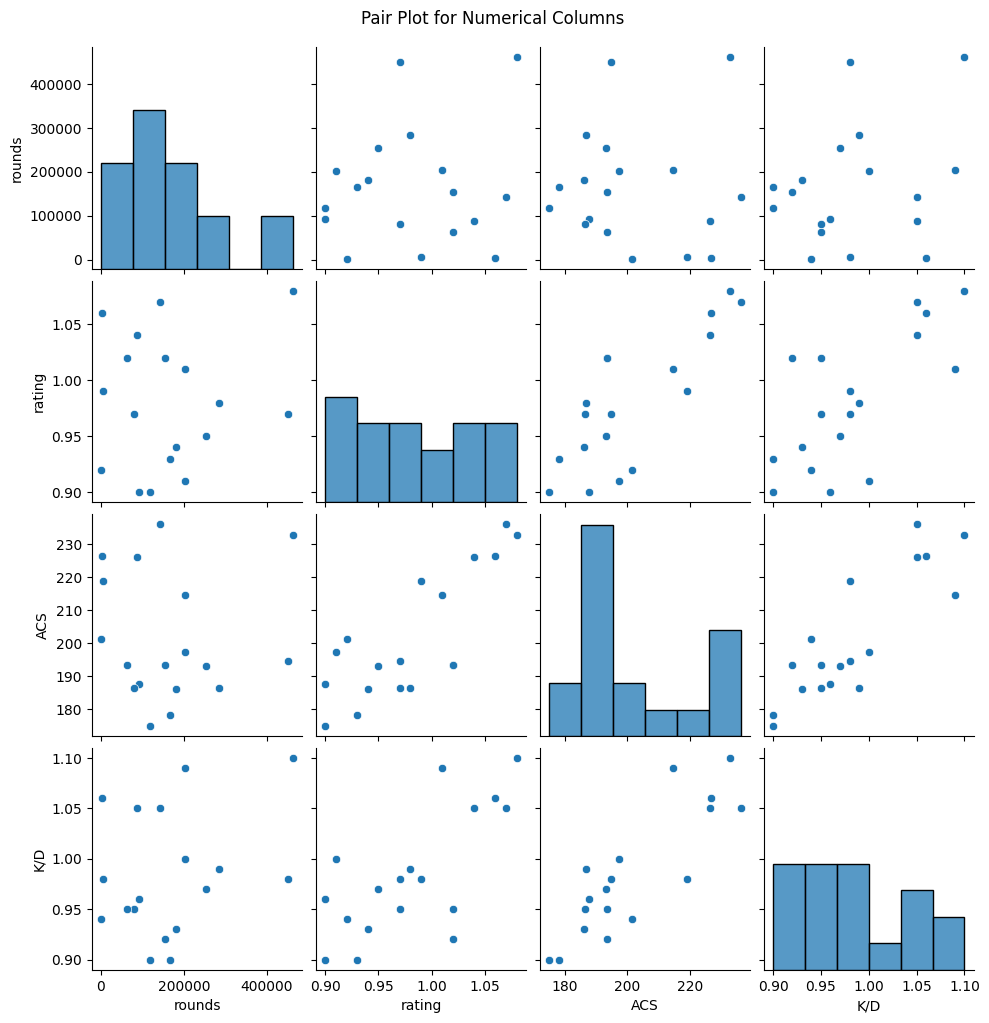

In [25]:
#pairplot
numerical_columns = ['rounds', 'rating', 'ACS', 'K/D']

df_numerical = df[numerical_columns]

sns.pairplot(df_numerical)
plt.suptitle('Pair Plot for Numerical Columns', y=1.02)
plt.show()